In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
!pip install citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

now= datetime.datetime.now()

# Generate Cities List


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
cloudiness =[]
country=[]
date=[]
humidity=[]
max_temp=[]
data=[]
wind_speed=[]

foundcities=[]
foundlat=[]
foundlng=[]

citycount=1

for city in cities:
    if citycount == citycount +1:
        print ("stopping at my dev limit")
        break
    cityurl= city
    response= requests.get(query_url+cityurl).json()
    cod = response.get("cod")
    
    if cod == 200:
        print (f"Processing Record {citycount} for City: {city}")
        
        data.append(response)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        foundcities.append(response['name'])
        foundlat.append(response['coord']['lat'])
        foundlng.append(response['coord']['lon'])
        
        citycount = citycount +1
    else:
        print(f"No weather data found for this city: {city}, weather server response code: {cod}")
        

Processing Record 1 for City: limanowa
Processing Record 2 for City: hami
Processing Record 3 for City: ahipara
Processing Record 4 for City: flinders
Processing Record 5 for City: klaksvik
Processing Record 6 for City: albany
Processing Record 7 for City: dawei
Processing Record 8 for City: lebu
Processing Record 9 for City: punta arenas
Processing Record 10 for City: kapaa
Processing Record 11 for City: tuy hoa
Processing Record 12 for City: cherskiy
Processing Record 13 for City: dikson
Processing Record 14 for City: kaili
Processing Record 15 for City: kvitok
Processing Record 16 for City: busselton
Processing Record 17 for City: cidreira
Processing Record 18 for City: kaitangata
Processing Record 19 for City: hilo
Processing Record 20 for City: rikitea
Processing Record 21 for City: sao joao da barra
Processing Record 22 for City: castro
Processing Record 23 for City: erenhot
Processing Record 24 for City: nizwa
Processing Record 25 for City: cape town
Processing Record 26 for Cit

Processing Record 159 for City: pangody
Processing Record 160 for City: sorland
Processing Record 161 for City: matamoros
No weather data found for this city: gorno-chuyskiy, weather server response code: 404
Processing Record 162 for City: chimoio
Processing Record 163 for City: santa helena de goias
Processing Record 164 for City: saldanha
Processing Record 165 for City: vestmanna
Processing Record 166 for City: ponta do sol
Processing Record 167 for City: elliot lake
Processing Record 168 for City: robertsonpet
Processing Record 169 for City: port lincoln
No weather data found for this city: sorvag, weather server response code: 404
No weather data found for this city: suao, weather server response code: 404
Processing Record 170 for City: merauke
Processing Record 171 for City: esna
Processing Record 172 for City: linfen
No weather data found for this city: lolua, weather server response code: 404
Processing Record 173 for City: moussoro
Processing Record 174 for City: sitka
Proces

Processing Record 322 for City: santa isabel
Processing Record 323 for City: broome
Processing Record 324 for City: halifax
Processing Record 325 for City: avarua
Processing Record 326 for City: chandil
Processing Record 327 for City: padang
Processing Record 328 for City: meadow lake
Processing Record 329 for City: miyako
Processing Record 330 for City: souillac
Processing Record 331 for City: fortuna
Processing Record 332 for City: peniche
No weather data found for this city: pemangkat, weather server response code: 404
Processing Record 333 for City: fulton
Processing Record 334 for City: seymchan
Processing Record 335 for City: veraval
Processing Record 336 for City: shenjiamen
Processing Record 337 for City: san cristobal
Processing Record 338 for City: victoria
Processing Record 339 for City: san francisco
Processing Record 340 for City: rawson
Processing Record 341 for City: constitucion
Processing Record 342 for City: severo-yeniseyskiy
Processing Record 343 for City: cap malhe

Processing Record 493 for City: loyga
Processing Record 494 for City: dudinka
Processing Record 495 for City: mattawa
Processing Record 496 for City: hambantota
Processing Record 497 for City: half moon bay
Processing Record 498 for City: aguimes
Processing Record 499 for City: kununurra
Processing Record 500 for City: kangaba
Processing Record 501 for City: tarko-sale
Processing Record 502 for City: manaure
Processing Record 503 for City: kipini
Processing Record 504 for City: lewiston
Processing Record 505 for City: susner
Processing Record 506 for City: krasnaya gorka
Processing Record 507 for City: carballo
Processing Record 508 for City: livingston
No weather data found for this city: halalo, weather server response code: 404
Processing Record 509 for City: ahmadpur
Processing Record 510 for City: rize
Processing Record 511 for City: garango
Processing Record 512 for City: anaco
Processing Record 513 for City: teguise
Processing Record 514 for City: esso
Processing Record 515 for 

In [6]:
weather_dict = {
    "City": foundcities,
    "Country": country,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Lat": foundlat,
    "Lng": foundlng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data_df= pd.DataFrame(weather_dict)
weather_data_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Limanowa,PL,40,1552406344,52,49.71,20.42,44.01,17.22
1,Hami,CN,0,1552406478,59,42.84,93.51,36.17,8.63
2,Ahipara,NZ,36,1552406424,100,-35.17,173.16,61.00,7.52
3,Flinders,AU,75,1552406433,72,-34.58,150.85,70.00,5.82
4,Klaksvik,FO,92,1552405800,75,62.23,-6.59,41.00,11.41


In [7]:
weather_data_df.to_csv("output_data/cities.csv", index=False, header=True)

# Plotting the Data

In [8]:
def plotvslatitude(inputlist):
    
    if inputlist == "Max Temp":
        ylabeltxt = "Max Temperature (Farenheit)"
        titlesub = "Max Temperature"
        filenamesub = "MaxTemperature"
    elif inputlist == "Humidity":
        titlesub = inputlist
        ylabeltxt = "Humidity (%)"
        filenamesub = "Humidity"
    elif inputlist == "Cloudiness":
        titlesub = inputlist
        ylabeltxt = "Cloudiness (%)"
        filenamesub = "Cloudiness"
    elif inputlist == "Wind Speed":
        titlesub = inputlist
        ylabeltxt = "Wind Speed (mph)"
        filenamesub = "WindSpeed"
    
    
    
    # Build a scatter plot for each data type
    plt.scatter(weather_data_df["Lat"], weather_data_df[inputlist], marker="o")

    # Incorporate the other graph properties
    todaydate = now.strftime("%m/%d/%Y")
    plt.title("City Latitude vs " + titlesub + " (" + todaydate + ")")
    plt.ylabel(ylabeltxt)
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure
    plt.savefig("output_data/LatitudeBy" + filenamesub + "ScatterPlotWorldCities.png")

    # Show plot
    plt.show()

Latitude vs. Temperature Plot

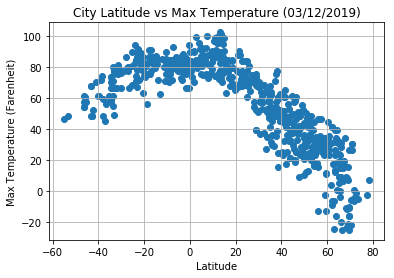

In [9]:
plotvslatitude("Max Temp")

Latitude vs. Humidity Plot

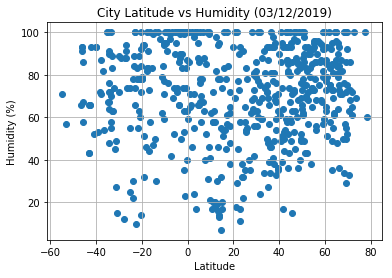

In [10]:
plotvslatitude("Humidity")

Latitude vs. Cloudiness Plot

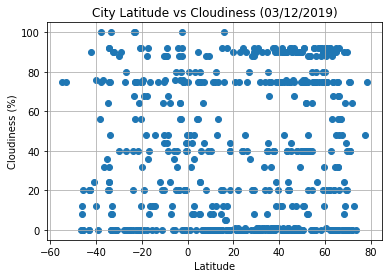

In [11]:
plotvslatitude("Cloudiness")

Latitude vs. Wind Speed Plot

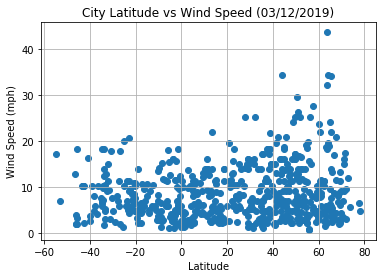

In [12]:
plotvslatitude("Wind Speed")